# Who Hits the Target? Forecasting Employee Productivity with Decision Trees

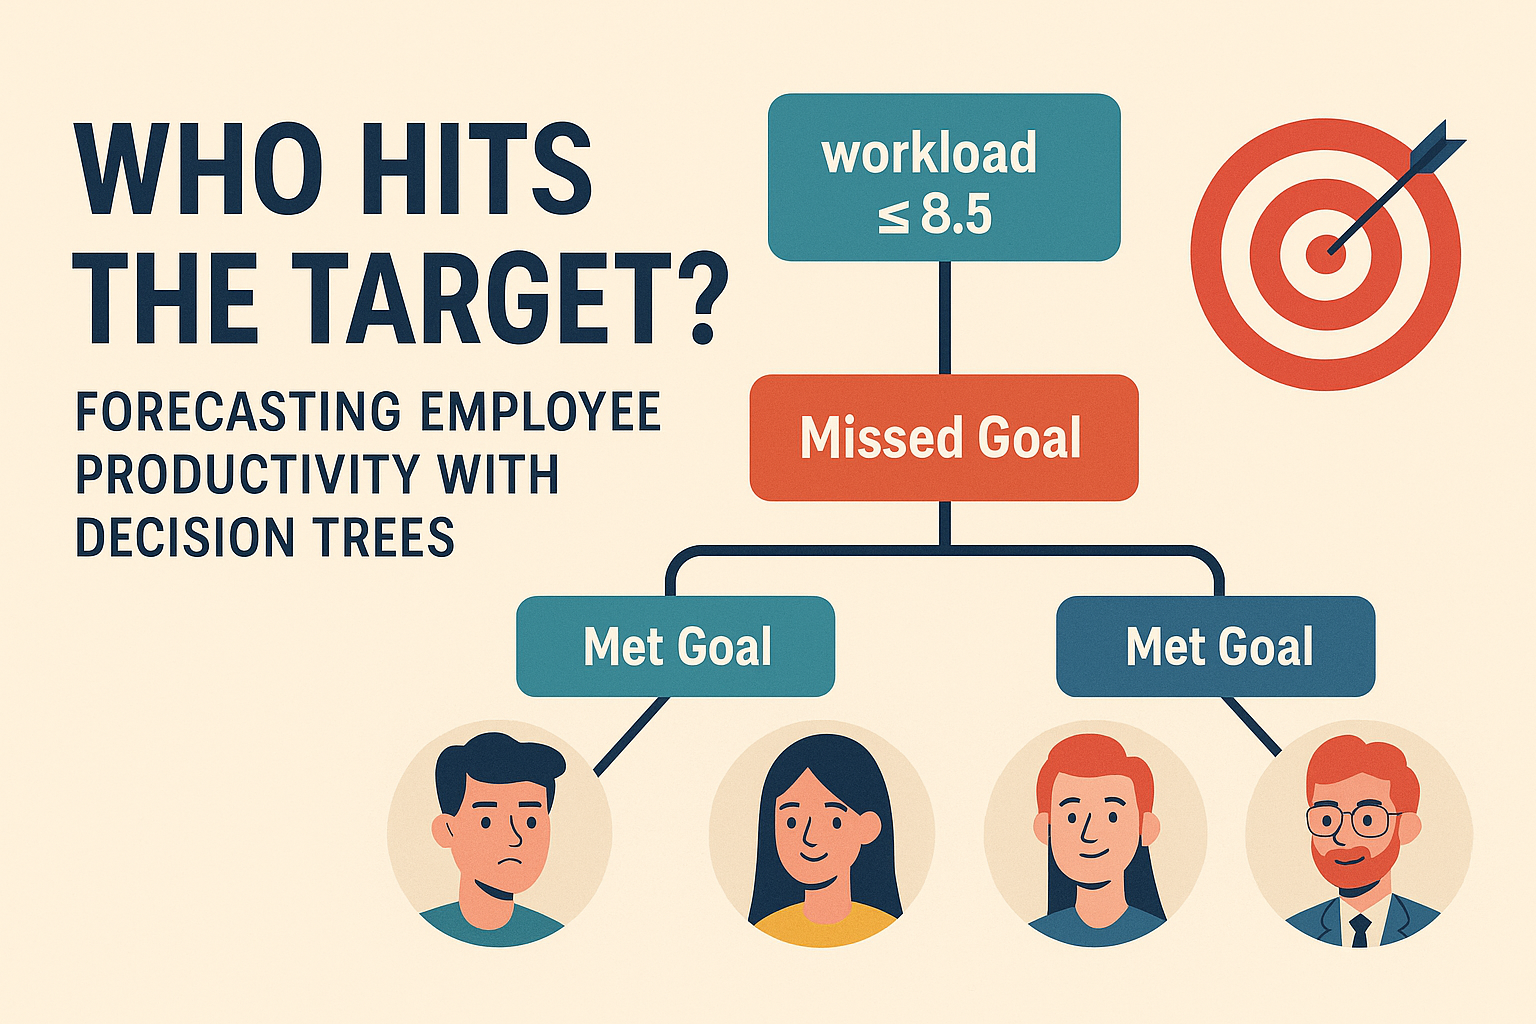

## Table of Contents

1. [Introduction](#Introduction)  
2. [Loading and Examining the Data](#Loading-and-Examining-the-Data)  
3. [Data Cleaning & Preprocessing](#Data-Cleaning-&-Preprocessing)  
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)  
    - [Numerical Distributions and Outliers](#Numerical-Distributions-and-Outliers)  
    - [Categorical Distributions](#Categorical-Distributions)  
5. [Creating and Analyzing the Binary Productivity Target](#Creating-and-Analyzing-the-Binary-Productivity-Target)  
6. [Encoding & Cleaning](#Encoding-&-Cleaning)  
7. [Training and Evaluating the Classification Tree Model](#Training-and-Evaluating-the-Classification-Tree-Model)  
8. [Decision Tree Analysis](#Decision-Tree-Analysis)  
9. [How to Read The Decision Tree](#How-to-Read-The-Decision-Tree)  
10. [Training and Evaluating the Random Forest Classifier](#Training-and-Evaluating-the-Random-Forest-Classifier)  
11. [Random Forest Model Analysis](#Random-Forest-Model-Analysis)  
12. [Conclusion](#Conclusion)  

## Introduction

This project investigates how employee productivity can be predicted based on various job-related features. The main objective is to identify whether an employee will meet a predefined productivity target, using supervised machine learning models. The dataset used is [Productivity Prediction of Garment Employees](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees), available on the UCI Machine Learning Repository.

To achieve this, I applied several classification algorithms, including Decision Trees and Random Forests. I optimized their performance through hyperparameter tuning using cost-complexity pruning and randomized search with cross-validation. The models were evaluated using training/test accuracy and cross-validation scores to ensure reliable generalization.

The final Decision Tree model achieved a test accuracy of 84.72%, slightly outperforming the tuned Random Forest. Feature importance analysis revealed that some factors contributed most significantly to predicting productivity outcomes. These results show that interpretable tree-based models can effectively forecast employee performance with solid accuracy.


## Loading and Examining the Data

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset
df = pd.read_csv('garments_worker_productivity.csv')

# Clean column names: remove leading/trailing whitespace
df.columns = df.columns.str.strip()

# Display dataset overview
display(df.head())
print("="*55)
print(" GARMENTS WORKER PRODUCTIVITY DATASET OVERVIEW ")
print("="*55, "\n")
print(df.info(), "\n")

print("="*55)
print(" DATA SUMMARY ")
print("="*55, "\n")
print(df.describe().transpose(), "\n")

print("="*55)
print(" MISSING VALUES ")
print("="*55, "\n")
print(df.isnull().sum(), "\n")

print("="*55)
print(" DUPLICATE ROWS ")
print("="*55, "\n")
print(f"Number of duplicate rows: {df.duplicated().sum()}\n")

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


 GARMENTS WORKER PRODUCTIVITY DATASET OVERVIEW 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_

In [2]:
# Print value counts for each column in a clean format
for col in df.columns:
    print("="*50)
    print(f" VALUE COUNTS FOR COLUMN: {col.upper()} ")
    print("="*50)
    print(df[col].value_counts(dropna=False).sort_index())
    print("\n")

 VALUE COUNTS FOR COLUMN: DATE 
date
1/1/2015     19
1/10/2015    22
1/11/2015    23
1/12/2015    23
1/13/2015    22
1/14/2015    21
1/15/2015    19
1/17/2015    21
1/18/2015    19
1/19/2015    19
1/20/2015    15
1/21/2015    19
1/22/2015    22
1/24/2015    23
1/25/2015    21
1/26/2015    19
1/27/2015    21
1/28/2015    21
1/29/2015    20
1/3/2015     21
1/31/2015    24
1/4/2015     21
1/5/2015     22
1/6/2015     21
1/7/2015     22
1/8/2015     22
2/1/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/14/2015    17
2/15/2015    19
2/16/2015    18
2/17/2015    20
2/18/2015    21
2/19/2015    20
2/2/2015     19
2/22/2015    20
2/23/2015    19
2/24/2015    19
2/25/2015    21
2/26/2015    21
2/28/2015    21
2/3/2015     19
2/4/2015     19
2/5/2015     18
2/7/2015     19
2/8/2015     19
2/9/2015     18
3/1/2015     20
3/10/2015    23
3/11/2015    24
3/2/2015     20
3/3/2015     22
3/4/2015     21
3/5/2015     19
3/7/2015     19
3/8/2015     22
3/9/2015     22
Name: count, dtype:

### 📊 Garments Worker Productivity Dataset Overview

The dataset contains **1197 records** with **15 columns**, representing daily production metrics for different garment manufacturing teams. It includes features such as scheduled targets, incentives, style changes, team composition, and actual productivity.

---

#### **Dataset Characteristics:**
- **Time Period:** Dates range from `MM-DD-YYYY` format, starting from January 2015.
- **Departments:** Two department types: `"sewing"` (note: originally misspelled as `"sweing"`) and `"finishing"`.
- **Team Info:** Data is grouped by team number (`team`), weekday (`day`), and monthly `quarter`.
- **Targets & Results:** 
  - `targeted_productivity` and `actual_productivity` both range from 0 to 1 (with a few values slightly over 1).
- **Labor & Work Metrics:**
  - `smv` (Standard Minute Value), `wip` (Work In Progress), `over_time`, and `incentive` measure work pressure and motivation.
  - `idle_time`, `idle_men`, and `no_of_style_change` reflect operational interruptions.
  - `no_of_workers` shows team size variation.

---

#### **Data Quality Checks:**
- ✅ **No duplicate rows** detected.
- ⚠️ **Missing values** found in:
  - `wip`: 506 missing entries (approx. 42%).
- ❌ **Typo detected** in `department`: `"sweing"` should be `"sewing"`.
- 🕒 `date` is currently a string and should be converted to datetime for time-based analysis.

[Back to Table of Contents](#Table-of-Contents)


## Data Cleaning & Preprocessing

In [3]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')

# Clean 'department': strip whitespaces and correct typos
df['department'] = df['department'].str.strip()
df['department'] = df['department'].replace('sweing', 'sewing')

# Remove outlier in 'targeted_productivity'
df = df[df['targeted_productivity'] != 0.07]

# Round 'no_of_workers' and convert to integer
df['no_of_workers'] = df['no_of_workers'].round().astype(int)

# Convert 'team' to string (categorical representation)
df['team'] = df['team'].astype(str)

### 🧹 Data Cleaning Steps

To improve data quality and prepare the dataset for modeling, the following preprocessing steps were applied:

---

#### ✅ 1. Convert `date` to datetime format

- This ensures the `date` column is treated as a proper datetime object, enabling time-based operations.

---

#### ✅ 2. Clean and correct values in `department`

- Removed any leading/trailing whitespace from values.
- Fixed a typo by replacing `"sweing"` with the correct label `"sewing"`.

---

#### ✅ 3. Remove an outlier from `targeted_productivity`

- The value `0.07` was an isolated low outlier, likely an error or an extreme case that could skew the model.

---

#### ✅ 4. Round and cast `no_of_workers` to integer

- Since the number of workers must be whole, fractional values like `30.5` were rounded and cast to integers.

---

#### ✅ 5. Convert `team` to string type

- Although stored as integers, `team` identifiers are categorical and shouldn't be treated as numeric during modeling. This conversion prevents unintended statistical interpretations.

In [4]:
df['quarter'] = df['quarter'].replace('Quarter5', 'Quarter4')

### 🛠️ Fixing Incorrect `quarter` Labels

During data exploration, I discovered that the `quarter` column — which is meant to represent **week groupings within a month** — contained an invalid label: `Quarter5`.

#### 🔍 What went wrong?
According to the dataset documentation, each month was divided into four quarters. However, a group of records dated **January 29th and 31st** were labeled as `Quarter5`, which is not defined in the dataset's structure. This likely happened because the original logic mistakenly assumed all months end on day 28 (as in February), causing days 29–31 to fall into an unnecessary fifth category.

#### ✅ Solution
All entries with `Quarter5` were **recoded as `Quarter4`**, which properly represents the final portion of each month. This correction ensures consistency with the dataset's intended structure and prevents misleading splits in the model based on incorrect temporal groupings.

In [5]:
# Drop uninformative and low-quality columns
df.drop(columns=['idle_time', 'idle_men', 'wip', 'no_of_style_change', 'incentive'], inplace=True)

### 🧹 Dropping Unnecessary Columns

To prepare the dataset for modeling, I dropped five columns that were either uninformative, highly imbalanced, or contained excessive missing values:

---

#### 🗑️ `idle_time` and `idle_men`

- Over **98%** of entries in both columns were `0`.
- No meaningful variance to help a model make splits or predictions.
- Likely to introduce noise rather than signal.

---

#### 🧩 `wip` (Work In Progress)

- Contained **42% missing values**.
- The non-missing values were **heavily skewed** and included extreme outliers (above 23,000).
- No clear connection to the target variable.
- Imputation would have introduced too much uncertainty.

---

#### 🎭 `no_of_style_change`

- Almost all values were `0`, with a max of `2`.
- **IQR = 0**, meaning no meaningful variability.

---

#### 💸 `incentive`

- Mostly zeroes, with a few very large values.
- Skewed distribution could bias models.
- No strong justification for keeping it.

[Back to Table of Contents](#Table-of-Contents)


## Exploratory Data Analysis

## Numerical Distributions and Outliers

In [6]:
# List of numerical columns in your dataset
numerical_columns = [
    'targeted_productivity',
    'smv',
    'over_time',
    'no_of_workers',
    'actual_productivity'
]

# Create a dataframe with summary statistics
summary_df = df[numerical_columns].describe().T

# Calculate IQR and outlier bounds
summary_df["IQR"] = summary_df["75%"] - summary_df["25%"]
summary_df["Lower Bound"] = summary_df["25%"] - 1.5 * summary_df["IQR"]
summary_df["Upper Bound"] = summary_df["75%"] + 1.5 * summary_df["IQR"]

# Display the summary statistics
display(summary_df)

,count,mean,std,min,25%,50%,75%,max,IQR,Lower Bound,Upper Bound
targeted_productivity,1196.0,0.730184,0.096053,0.350000,0.700000,0.750000,0.800000,0.800000,0.100000,0.550000,0.950000
smv,1196.0,15.054482,10.944561,2.900000,3.940000,15.260000,23.832500,54.560000,19.892500,-25.898750,53.671250
over_time,1196.0,4565.459866,3349.508875,0.000000,1440.000000,3960.000000,6937.500000,25920.000000,5497.500000,-6806.250000,15183.750000
no_of_workers,1196.0,34.576923,22.179412,2.000000,9.000000,34.000000,57.000000,89.000000,48.000000,-63.000000,129.000000
actual_productivity,1196.0,0.735269,0.174453,0.233705,0.650382,0.773333,0.850268,1.120437,0.199885,0.350555,1.150095


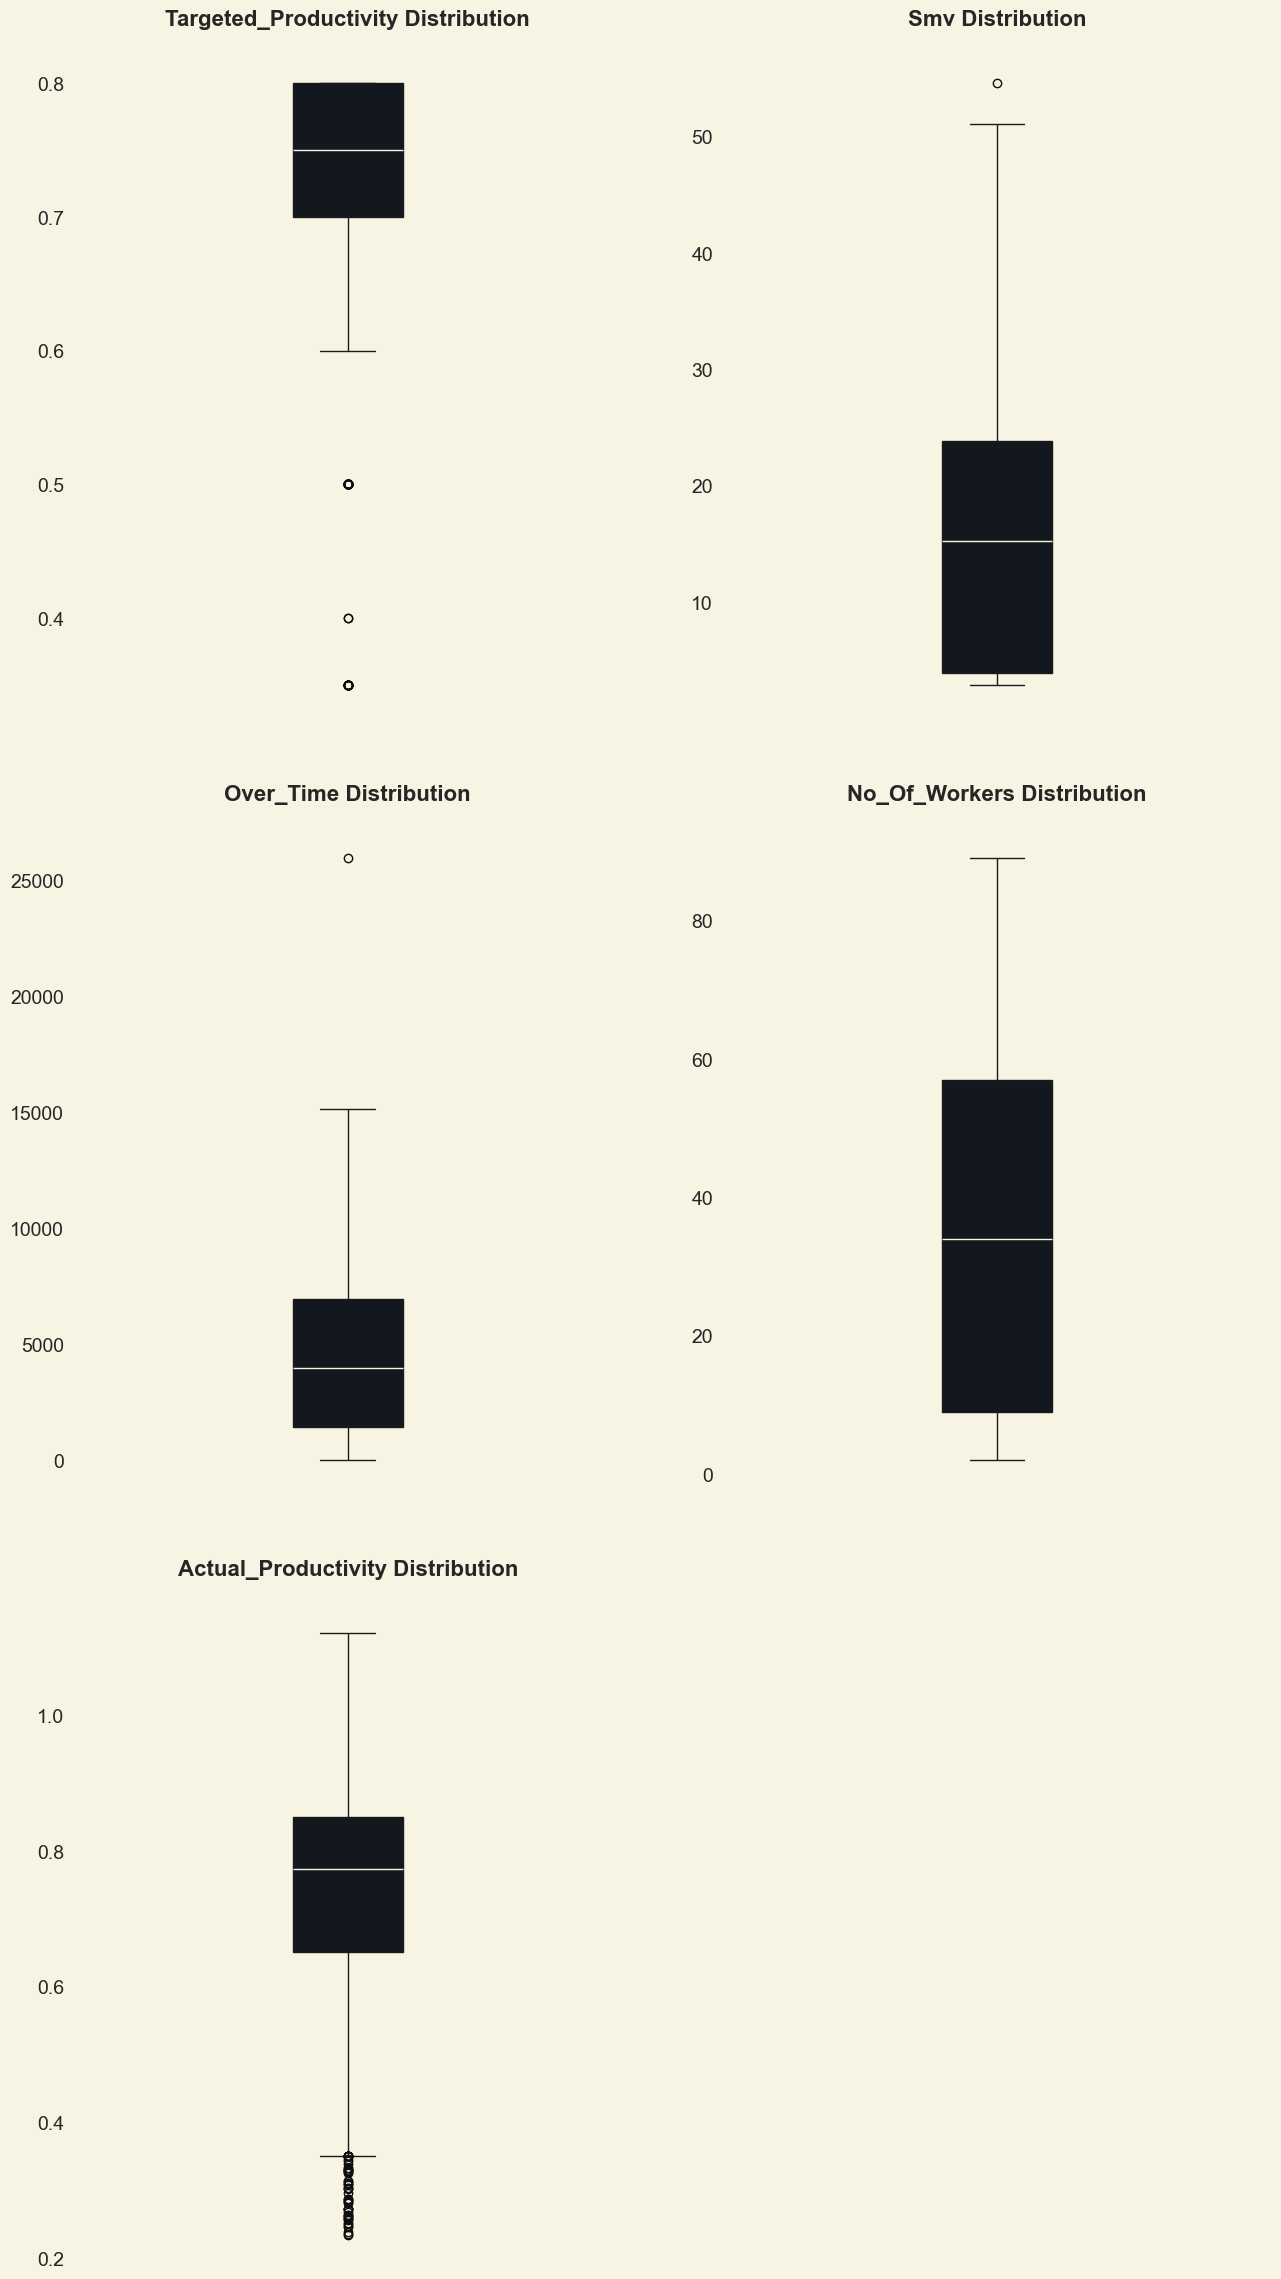

In [7]:
# Set visual style
sns.set_style("dark")
plt.rcParams["axes.facecolor"] = "#F8F4E3"
plt.rcParams["figure.facecolor"] = "#F8F4E3"
plt.rcParams["axes.edgecolor"] = "#F8F4E3"
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelpad"] = 14

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(
        data=df, y=col, ax=ax, color='#101820', width=.2,
        boxprops=dict(edgecolor="#1a1a1a"),
        medianprops=dict(color="#F8F4E3"),
        whiskerprops=dict(color="#1a1a1a"),
        capprops=dict(color="#1a1a1a")
    )
    ax.set_title(f"{col.title()} Distribution", pad=20)
    ax.set_ylabel("")
    ax.set_xlabel("")

# Hide any unused axes
for j in range(5, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=5)
plt.show()

### 📊 Distribution Analysis of Numerical Features

After visualizing the numerical columns using boxplots and computing descriptive statistics, here's an overview of each column:

---

#### 🎯 `targeted_productivity`
- **Range**: [0.35, 0.80] with very low standard deviation (`std ≈ 0.096`).
- **IQR**: 0.10 — tightly clustered values.
- **Outliers**: A few values below the lower bound 0.55, which indicates the presence of lower-end outliers in this column.

---

#### 🧵 `smv` (Standard Minute Value)
- **Range**: [2.9, 54.56], with a high standard deviation.
- **IQR**: 19.89 — relatively wide spread.
- **Outliers**: A few values exceed the upper bound (53.67), indicating mild outliers.

---

#### ⏱️ `over_time`
- **Range**: [0, 25920], with a large standard deviation (`std ≈ 3349`).
- **IQR**: 5497.5 — extremely wide spread.
- **Outliers**: Several values far exceed the upper bound (15,183.75), indicating strong positive skew.

---

#### 👷 `no_of_workers`
- **Range**: [2, 89], moderate spread.
- **IQR**: 48 — shows high variability.
- **Outliers**: Values beyond 129 would be outliers, but max is 89. No outliers detected.

---

#### ⚙️ `actual_productivity`
- **Range**: [0.2337, 1.1204], moderately spread.
- **IQR**: 0.1999 — reasonable distribution.
- **Outliers**: Max value slightly exceeds upper bound (1.15), indicating a mild outlier.

[Back to Table of Contents](#Table-of-Contents)


In [8]:
# Define the IQR bounds for each column
iqr_bounds = {
    'targeted_productivity': (0.55, 0.95),
    'smv': (-25.898750, 53.671250),
    'over_time': (-6806.250000, 15183.750000),
    'no_of_workers': (-63.000000, 129.000000),
    'actual_productivity': (0.350555, 1.150095)
}

# Drop rows with outliers
for col, (lower, upper) in iqr_bounds.items():
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Print new shape
print("New shape after outlier removal:", df.shape)

New shape after outlier removal: (1078, 10)


### Outlier Removal

To ensure that the dataset is clean and the model is not influenced by extreme values, I performed outlier removal using the Interquartile Range (IQR) method. For each numerical feature, I calculated the lower and upper bounds as follows:

- **Lower Bound** = Q1 − 1.5 × IQR  
- **Upper Bound** = Q3 + 1.5 × IQR  

Any data point lying outside of these bounds was considered an outlier and removed from the dataset. This helps in reducing the skewness and variability caused by extreme values, which can negatively impact the performance and reliability of regression models.

After removing all rows that contained outliers in any of the numerical columns, the dataset was reduced to **1078 rows and 10 columns**:

**New shape after outliers removal: (1078, 10)**

[Back to Table of Contents](#Table-of-Contents)


## Categorical Distributions

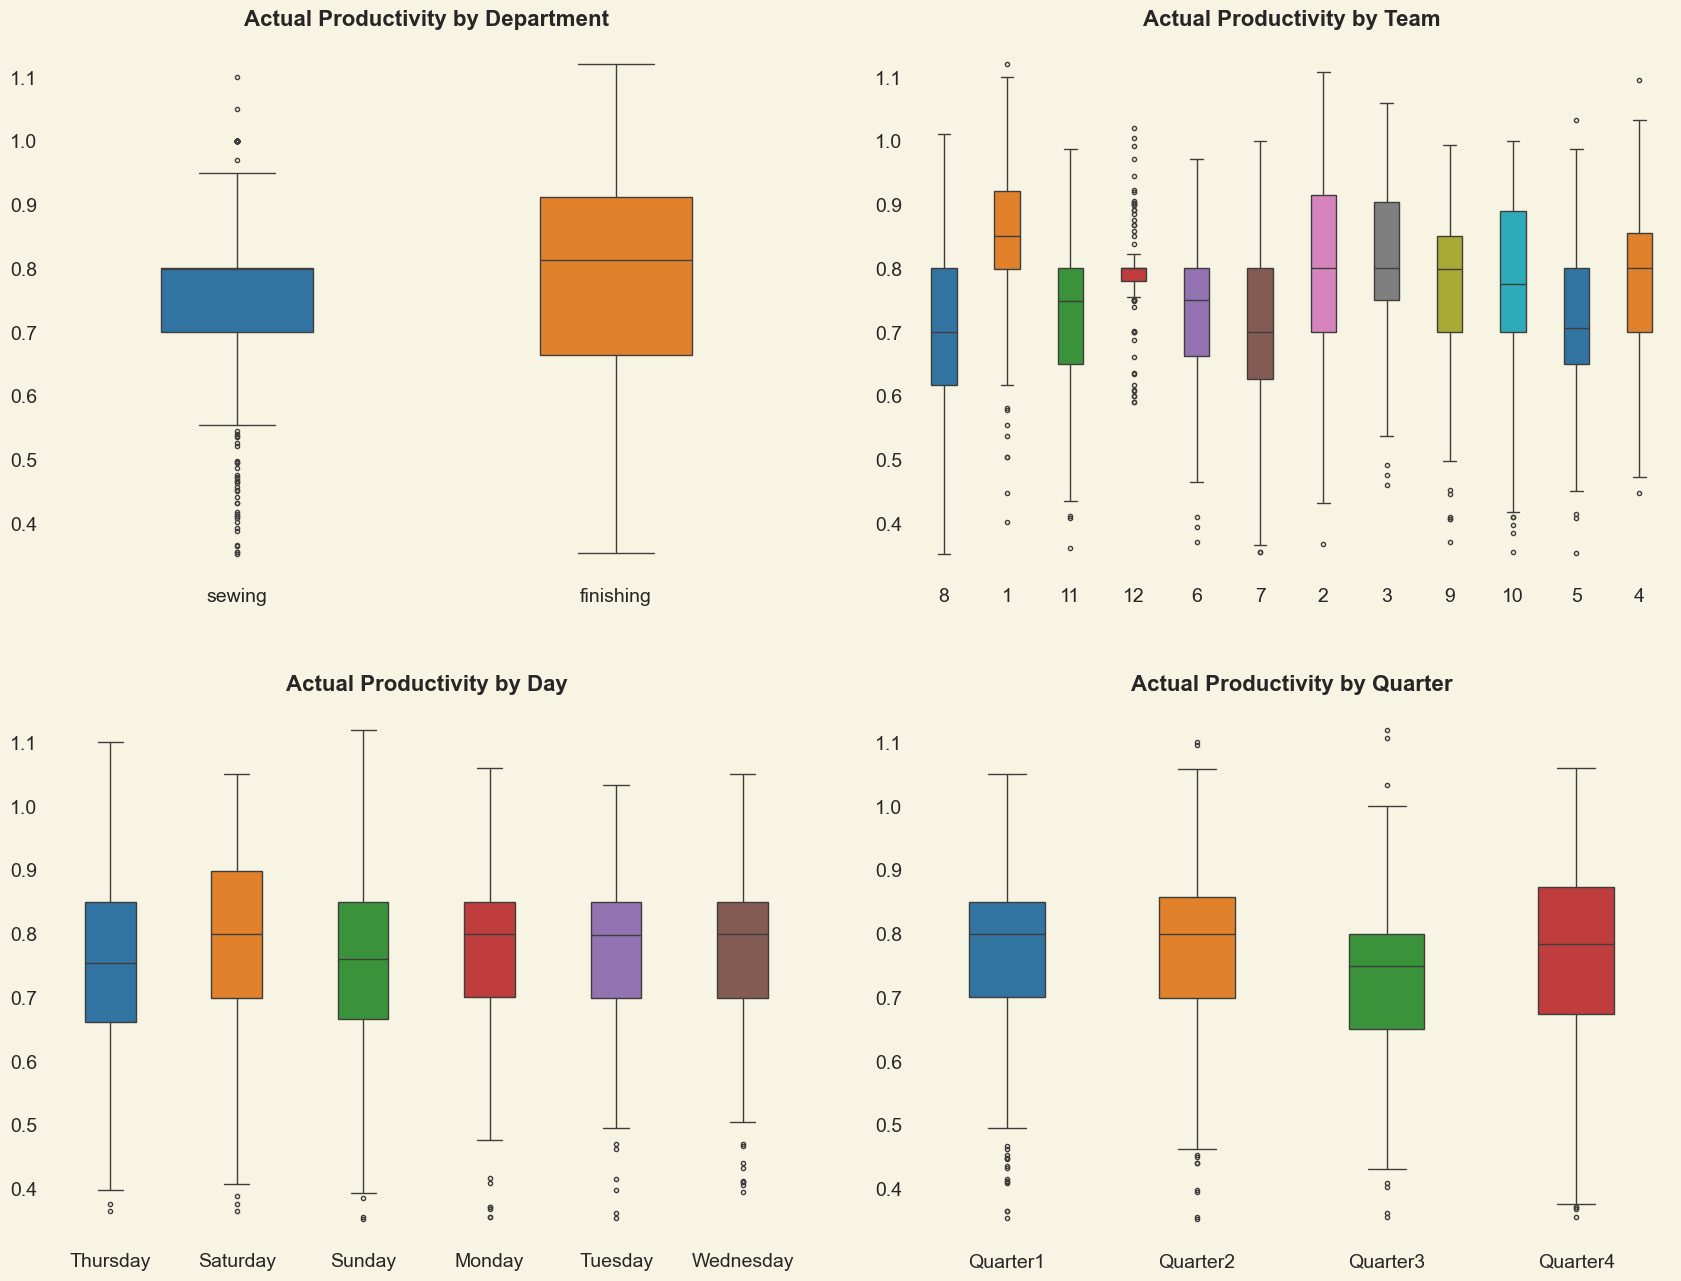

In [9]:
# Define the categorical columns to plot
categorical_columns = ['department', 'team', 'day', 'quarter']

# Set up subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

# Plot boxplots for each categorical column
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.boxplot(
        data=df, 
        x=col, 
        y='actual_productivity', 
        ax=ax, 
        palette="tab10", 
        hue=col,
        width=0.4,
        fliersize=3,
        linewidth=1
    )
    
    # Title and axis labels
    ax.set_title(f'Actual Productivity by {col.title()}', pad=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(pad=5)
plt.show()

In [10]:
# List to hold all summary DataFrames
summary_frames = []

# Compute descriptive stats for each categorical column
for col in categorical_columns:
    group_stats = (
        df.groupby(col)['actual_productivity']
        .describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
        .reset_index()
        .assign(column=col)
        .rename(columns={'25%': 'Q1', '50%': 'median', '75%': 'Q3'})
    )
    summary_frames.append(group_stats)

# Combine into one DataFrame
summary_df = pd.concat(summary_frames, ignore_index=True)

# Reorder columns
summary_df = summary_df[['column', col] + [c for c in summary_df.columns if c not in ['column', col]]]

# Display the summary DataFrame
display(summary_df)

,column,quarter,department,count,mean,std,min,Q1,median,Q3,max,team,day
0,department,NaN,finishing,453.0,0.778488,0.168299,0.354444,0.664583,0.813371,0.912037,1.120437,NaN,NaN
1,department,NaN,sewing,625.0,0.754777,0.118693,0.353260,0.700355,0.799963,0.800535,1.100484,NaN,NaN
2,team,NaN,NaN,99.0,0.837632,0.134748,0.403242,0.800117,0.850502,0.922206,1.120437,1,NaN
3,team,NaN,NaN,92.0,0.754934,0.163472,0.355428,0.700058,0.775688,0.889907,0.999995,10,NaN
4,team,NaN,NaN,76.0,0.723595,0.131550,0.362667,0.650281,0.750050,0.800530,0.987880,11,NaN
5,team,NaN,NaN,95.0,0.796595,0.088421,0.590617,0.780986,0.800402,0.800848,1.020000,12,NaN
6,team,NaN,NaN,99.0,0.809453,0.151224,0.368719,0.700623,0.800594,0.915946,1.108125,2,NaN
7,team,NaN,NaN,87.0,0.819087,0.120321,0.460579,0.750243,0.800513,0.904209,1.059621,3,NaN
8,team,NaN,NaN,95.0,0.784979,0.129147,0.447917,0.700603,0.800435,0.856063,1.096633,4,NaN
9,team,NaN,NaN,79.0,0.729297,0.140134,0.354444,0.650055,0.707446,0.800980,1.033570,5,NaN


### 📊 Summary Analysis of `actual_productivity` by Categorical Groups

The graph and the table above reflect and visualize key distribution statistics of `actual_productivity` segmented by various categorical features: `department`, `team`, `day`, and `quarter`. The purpose of this breakdown is to uncover potential relationships between these groupings and the performance levels of production lines.

---

#### 🏢 Department

- **Finishing (n=453)**  
  - Highest average productivity: **0.778**
  - Also shows the highest **maximum** value at **1.120**
  - Higher dispersion (`std=0.168`) suggests more variability in productivity across this group.

- **Sewing (n=625)**  
  - Lower mean productivity: **0.755**
  - More concentrated productivity range (`std=0.119`), indicating more consistent performance.

✅ *Insight:* The finishing department tends to outperform sewing, but with slightly higher variability.

---

#### 👥 Team

- Teams 1, 2, 3 show notably **higher means** (≥ 0.809), suggesting stronger performers.
- Teams 6, 7, 8, 11, 12 show lower mean values (≤ 0.725), with Team 12 being the lowest (**mean = 0.701**).
- Several teams (e.g. 1, 2, 3) also demonstrate high max values (≥ 1.10), suggesting peak performers exist within those groups.

✅ *Insight:* There's a clear performance gap between teams, with some showing higher productivity and consistency. This could reflect differences in leadership, training, or experience.

---

#### 📆 Day of the Week

- **Saturday (n=170)** and **Monday (n=179)** yield the **highest means**, both around **0.771–0.780**.
- **Thursday** and **Sunday** show slightly lower averages (~0.749–0.753).
- Variability (`std`) is consistent across days (~0.13–0.15), implying no dramatic fluctuations.

✅ *Insight:* Weekends (especially Saturday) appear to slightly outperform midweek days, perhaps due to different staffing patterns or shifts.

---

#### 🗓️ Quarter

- **Q1 and Q2** exhibit the **highest productivity** means (≥ 0.773), coupled with high upper bounds.
- **Q3** has the **lowest mean** (**0.741**) and the **lowest median**, indicating a drop in performance during this period.
- **Q4** shows intermediate performance with the **highest variability** (`std=0.162`).

✅ *Insight:* Seasonal factors could influence productivity. Performance dips in Q3 may relate to holidays, weather, or staffing constraints.

[Back to Table of Contents](#Table-of-Contents)


## Creating and Analyzing the Binary Productivity Target

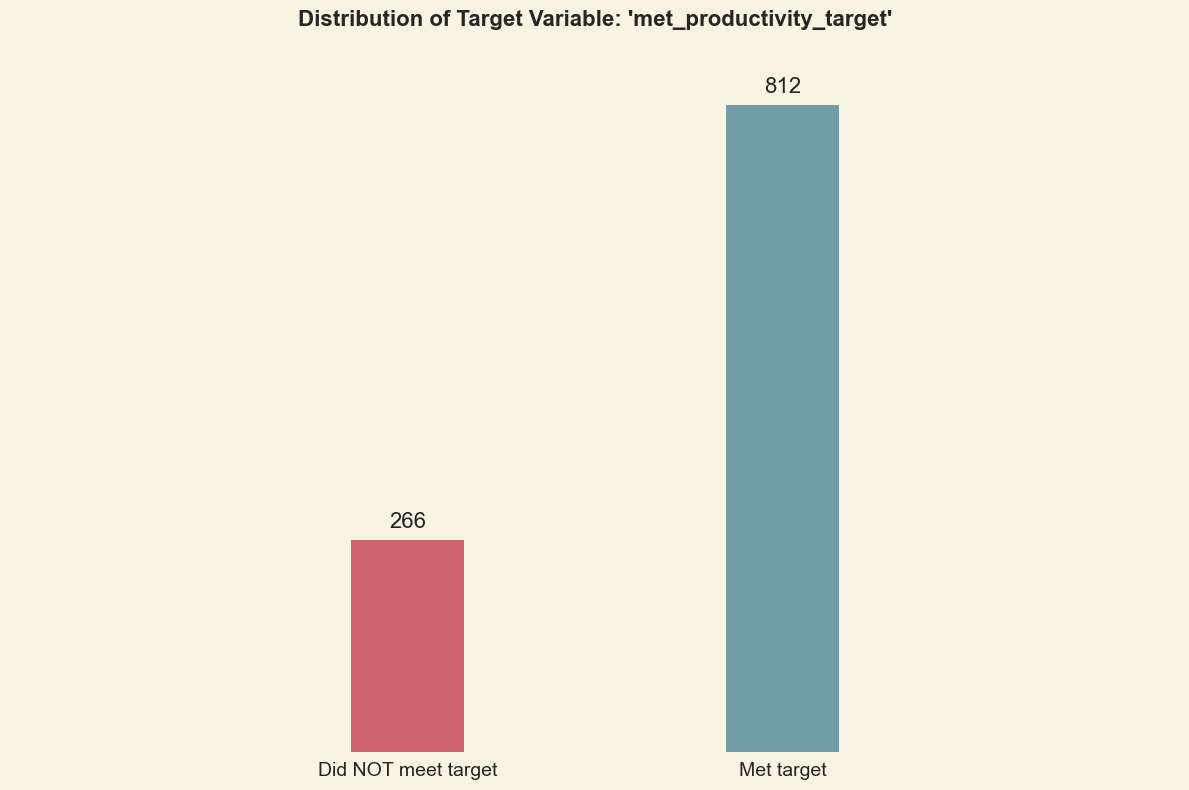

In [11]:
# Create binary target column
df['met_productivity_target'] = (df['actual_productivity'] >= df['targeted_productivity']).astype(int)

# Calculate value counts
target_counts = df['met_productivity_target'].value_counts().sort_index()

# Create a figure for the bar chart
plt.figure(figsize=(12, 8))

# Create a bar plot with custom colors
ax = sns.barplot(
    x=target_counts.index,
    y=target_counts.values,
    hue=target_counts.index,
    palette=["#E05263", "#69A2B0"],
    legend=False,
    width=0.3,
    edgecolor='none'
)

# Add title, remove x-axis label, adjust tick styles
ax.set_title("Distribution of Target Variable: 'met_productivity_target'")
ax.set_xlabel("")
plt.xticks([0, 1], ['Did NOT meet target', 'Met target'])
plt.yticks([], [])                      
plt.ylim(0, 900)
ax.margins(x=0.7)

# Add values on top of each bar
for index, value in enumerate(target_counts.values):
    ax.text(index, value + 10,   # Position text slightly above the bar
            f'{value:,}',        # Format value with commas
            ha='center',         # Center text horizontally
            va='bottom',         # Align text to the bottom
            fontsize=16)         # Font size

# Remove grid borders
sns.despine(bottom=True, left=True)

# Display the plot
plt.tight_layout()
plt.show()

### Creating a New Target Column: `met_productivity_target`

To prepare for building a classification tree model, I created a new binary target column called `met_productivity_target`. This column indicates whether the actual productivity met or exceeded the targeted productivity for each record.

- **Why create this column?**  
  Since the goal is to predict if productivity targets are achieved, this binary target simplifies the problem into a classification task. Instead of predicting continuous productivity values, the model will learn to classify records as either meeting the target (`1`) or not (`0`).

- **How is it created?**  
  The column was generated by comparing `actual_productivity` to `targeted_productivity`. If actual productivity is greater than or equal to the target, the value is set to `1`; otherwise, it is `0`.

### Distribution of the New Target

The distribution of `met_productivity_target` is as follows:

| Value | Count |
|-------|--------|
| 1     | 812    |
| 0     | 266    |

This shows that the majority of records (approximately 75%) met or exceeded their productivity targets, while about 25% did not. The class imbalance is moderate and will be considered during model training to ensure balanced performance.

This binary target will be used as the outcome variable in the upcoming classification tree modeling phase.

[Back to Table of Contents](#Table-of-Contents)


## Encoding & Cleaning

In [12]:
# Drop the 'date' column
df = df.drop(columns=['date'])

# Convert the 'quarter' column from categorical strings to ordinal integers (Q1=1, Q2=2, etc.)
df['quarter'] = df['quarter'].map({
    'Quarter1': 1,
    'Quarter2': 2,
    'Quarter3': 3,
    'Quarter4': 4
})

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['day', 'team', 'department'], drop_first=True)

# Convert the boolean columns to 0/1 integers
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Preview the encoded DataFrame
df_encoded.head()

,quarter,targeted_productivity,smv,over_time,no_of_workers,actual_productivity,met_productivity_target,day_Saturday,day_Sunday,day_Thursday,...,team_12,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,department_sewing
0,1,0.80,26.16,7080,59,0.940725,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,1,0.75,3.94,960,8,0.886500,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0.80,11.41,3660,30,0.800570,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.80,11.41,3660,30,0.800570,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,1,0.80,25.90,1920,56,0.800382,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


### Data Preprocessing: Encoding and Cleaning

---

In this step, I prepared the dataset for modeling by performing the following preprocessing actions:

1. **Dropped the `date` column**  
   Since `date` is a timestamp without inherent numerical meaning for the model and we’re not working with time series features, I removed it to avoid adding noise.

2. **Converted `quarter` to ordinal integers**  
   The `quarter` column originally contained string values like `"Quarter1"`, `"Quarter2"`, etc.  
   These were mapped to integer values (1 to 4) to preserve their natural order, which can be useful for models that capture ordinal relationships.

3. **Applied one-hot encoding to categorical variables**  
   I used `pd.get_dummies()` on the `day`, `team`, and `department` columns to convert them into binary indicator variables.  
   I also set `drop_first=True` to avoid multicollinearity by removing one dummy per category.

4. **Converted boolean columns to integers**  
   After one-hot encoding, the new dummy columns are of boolean type (`True`/`False`).  
   I converted these to integers (`1`/`0`) so they can be used in machine learning models that require numerical input.

[Back to Table of Contents](#Table-of-Contents)


## Training and Evaluating the Classification Tree Model

In [13]:
# Define features and target
X = df_encoded.drop(columns=['actual_productivity', 'met_productivity_target'])
y = df_encoded['met_productivity_target']

# Split dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train target distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nTest target distribution:")
print(y_test.value_counts(normalize=True) * 100)

Train target distribution:
met_productivity_target
1    75.290023
0    24.709977
Name: proportion, dtype: float64

Test target distribution:
met_productivity_target
1    75.462963
0    24.537037
Name: proportion, dtype: float64


### 🎯 Target Distribution (Stratified Split)

---

To ensure balanced representation of both classes in the training and testing sets, I used `stratify=y` during the split. This helped preserve the target label distribution:

- **Train Set**:  
  - Met Productivity: **75.29%**  
  - Did Not Meet Productivity: **24.71%**

- **Test Set**:  
  - Met Productivity: **75.46%**  
  - Did Not Meet Productivity: **24.54%**

In [14]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'ccp_alpha': [0.0, 0.001, 0.01]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Print the best parameters and accuracy scores in a clean format
print("🎯 Best Hyperparameters:")
for param, value in grid_search.best_params_.items():
    print(f"  - {param:<20}: {value}")

print(f"\n✅ Train Accuracy: {grid_search.best_estimator_.score(X_train, y_train):.2%}")
print(f"✅ Test Accuracy : {grid_search.best_estimator_.score(X_test, y_test):.2%}")

🎯 Best Hyperparameters:
  - ccp_alpha           : 0.0
  - max_depth           : 5
  - min_samples_leaf    : 10
  - min_samples_split   : 2

✅ Train Accuracy: 83.87%
✅ Test Accuracy : 84.72%


### 🔧 Model Tuning with GridSearchCV

---

I applied **GridSearchCV** to optimize key hyperparameters of the decision tree, including:

- `ccp_alpha`: Cost-complexity pruning value
- `max_depth`: Maximum tree depth
- `min_samples_leaf`: Minimum samples required in a leaf node
- `min_samples_split`: Minimum samples required to split a node

### ✅ Model Performance

With the tuned model:

- **Train Accuracy**: 83.87%  
- **Test Accuracy**: 84.72%

The model generalizes well and shows no signs of overfitting. The relatively shallow depth and pruning constraints likely helped reduce complexity while preserving predictive performance.

[Back to Table of Contents](#Table-of-Contents)


In [15]:
# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Classification reports
print("📊 Train Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=['Missed Goal', 'Met Goal']))

print("📊 Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Missed Goal', 'Met Goal']))

📊 Train Classification Report:
              precision    recall  f1-score   support

 Missed Goal       0.76      0.51      0.61       213
    Met Goal       0.86      0.95      0.90       649

    accuracy                           0.84       862
   macro avg       0.81      0.73      0.75       862
weighted avg       0.83      0.84      0.83       862

📊 Test Classification Report:
              precision    recall  f1-score   support

 Missed Goal       0.74      0.58      0.65        53
    Met Goal       0.87      0.93      0.90       163

    accuracy                           0.85       216
   macro avg       0.81      0.76      0.78       216
weighted avg       0.84      0.85      0.84       216



## 📈 Classification Performance Analysis

---

I evaluated the tuned decision tree model using additional metrics beyond accuracy, including precision, recall, and F1-score.

### 🧪 Test Set Results

---

- **Accuracy**: 85%
- **Precision**:
  - *Missed Goal*: 0.74
  - *Met Goal*: 0.87
- **Recall**:
  - *Missed Goal*: 0.58
  - *Met Goal*: 0.93
- **F1-score**:
  - *Missed Goal*: 0.65
  - *Met Goal*: 0.90
- **Macro Avg F1-score**: 0.78  
- **Weighted Avg F1-score**: 0.84

### 🧪 Train Set Results

---

- **Accuracy**: 84%
- **Precision**:
  - *Missed Goal*: 0.76
  - *Met Goal*: 0.86
- **Recall**:
  - *Missed Goal*: 0.51
  - *Met Goal*: 0.95
- **F1-score**:
  - *Missed Goal*: 0.61
  - *Met Goal*: 0.90
- **Macro Avg F1-score**: 0.75  
- **Weighted Avg F1-score**: 0.83

### 🔍 Interpretation

The model performs well overall, especially on the majority class (*Met Goal*), with high precision and recall. It struggles more with the minority class (*Missed Goal*), particularly in recall (51% on train, 58% on test), indicating that it misses some of these cases.

However, the balance between train and test performance suggests that the model generalizes effectively without overfitting. The weighted average F1-scores (~0.84) confirm consistent performance across both sets.

[Back to Table of Contents](#Table-of-Contents)


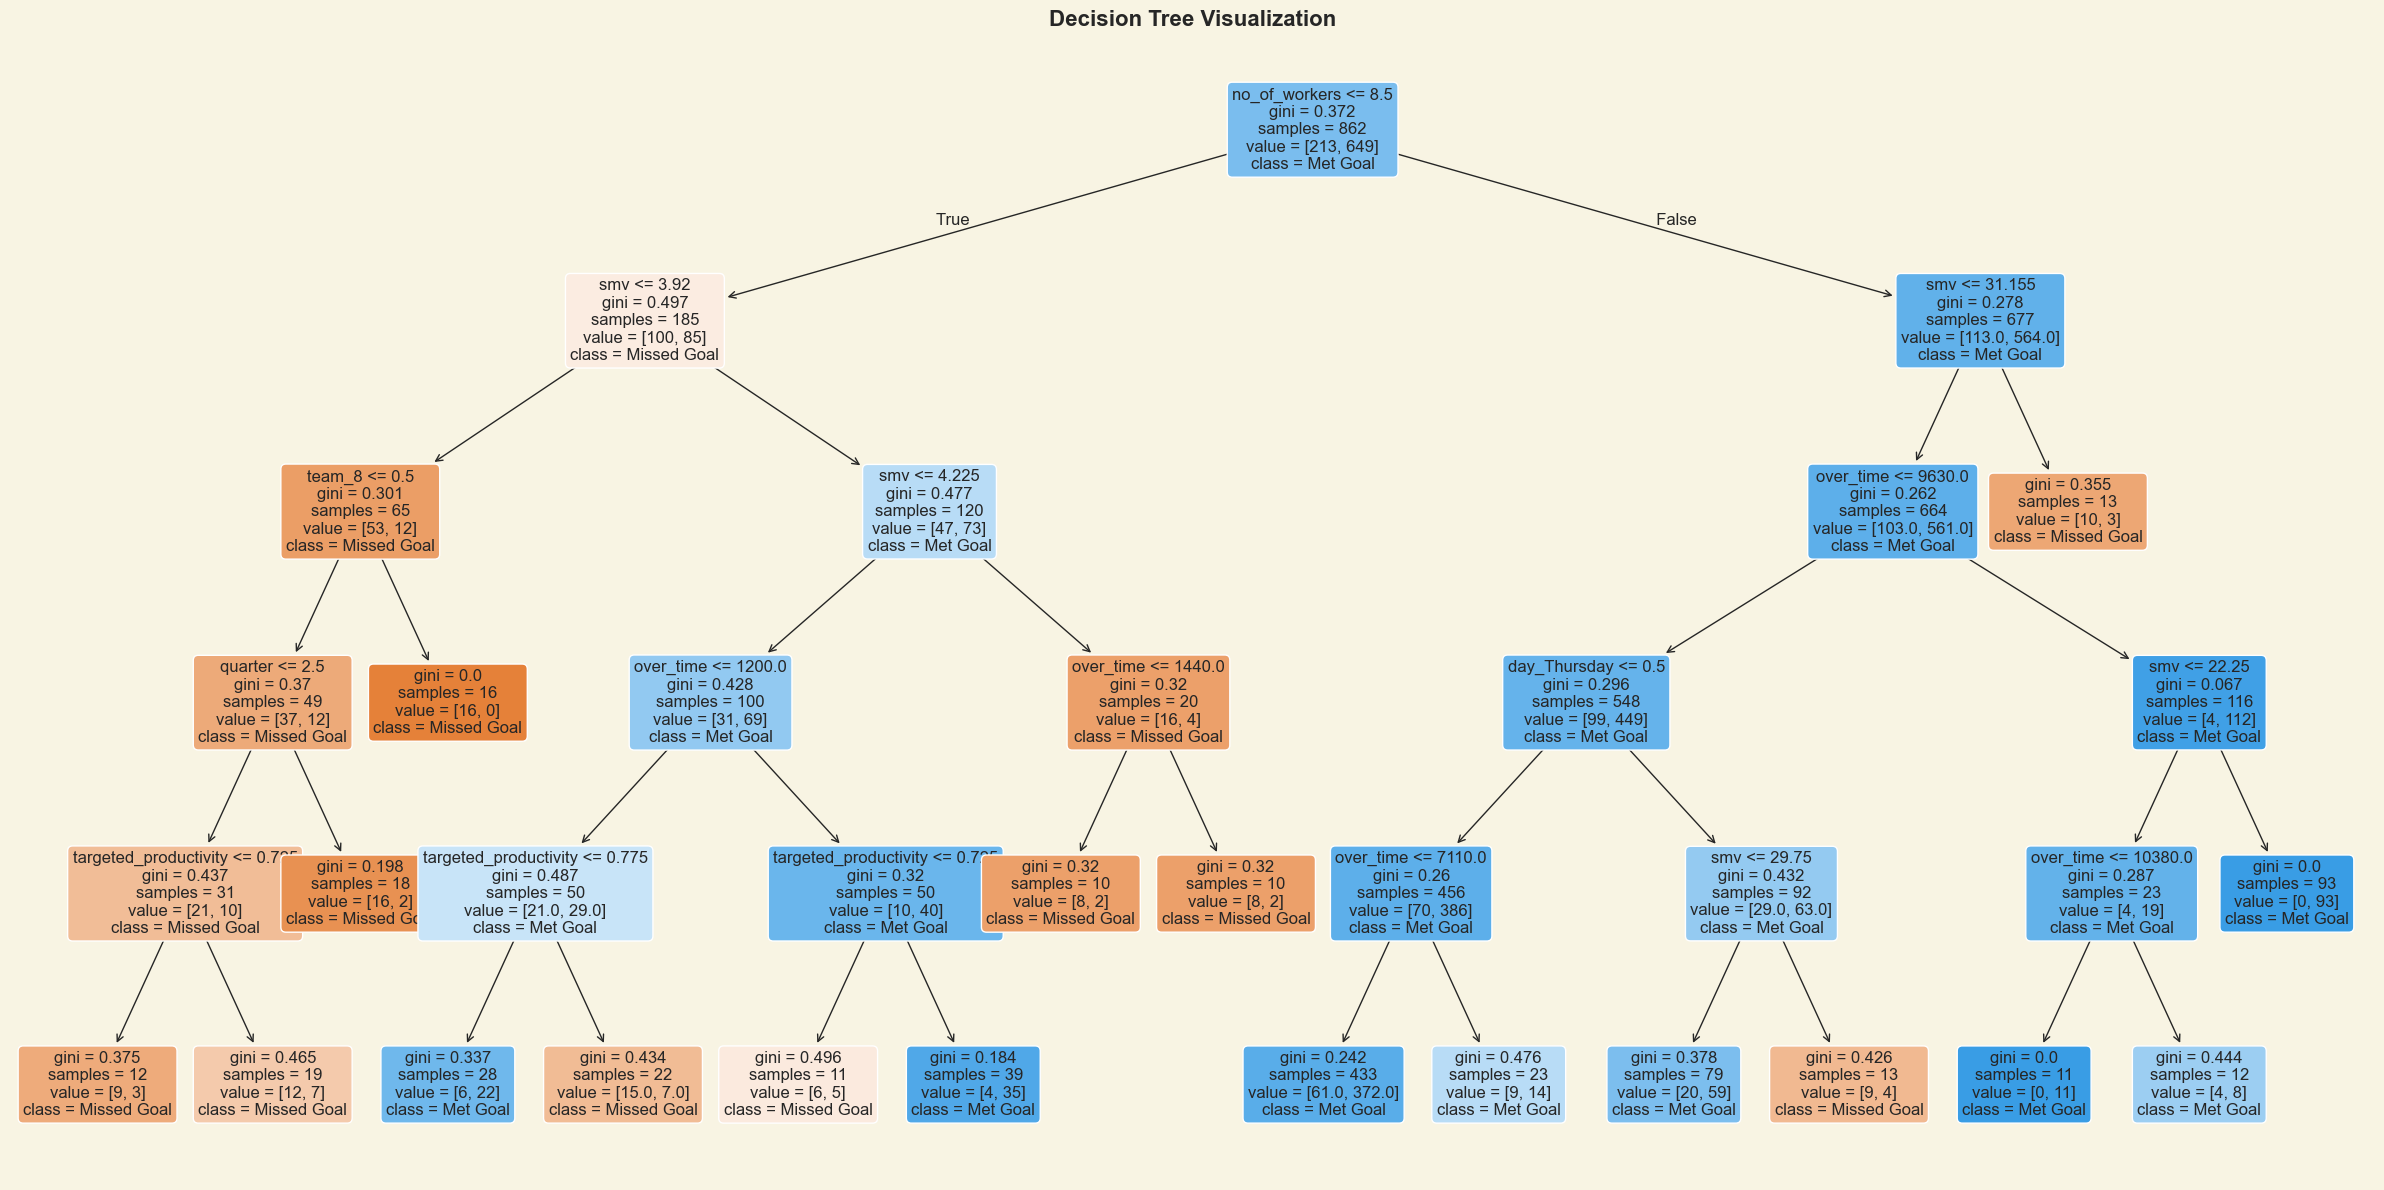

In [16]:
# Set figure size and background
plt.figure(figsize=(24, 12))

# Plot the decision tree
plot_tree(
    best_model,                    
    feature_names=X.columns,       
    class_names=['Missed Goal', 'Met Goal'],
    filled=True,                   
    rounded=True,                  
    fontsize=12                    
)

plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show()

## Decision Tree Analysis

---

The decision tree aims to classify whether productivity targets were **Met** or **Missed** based on various workplace features. Below are key observations from the visualization:

### 🌳 Root Node:
- **Feature:** `no_of_workers <= 8.5`
- **Gini impurity:** 0.372
- **Samples:** 862
- **Majority class:** **Met Goal** (649 vs 213)
- This split suggests that team size is a strong early indicator of performance.

---

### 🔹 Left Subtree (Fewer Workers)
- Branches into splits using features like:
  - `smv` (Standard Minute Value)
  - `team_8`
  - `quarter`
  - `targeted_productivity`
- **Pattern:** Smaller teams and lower SMV often lead to **Missed Goals**.
- **Subtrees:** Some branches show pure nodes (e.g., `gini = 0.0`), indicating strong predictive power at leaf level.

---

### 🔸 Right Subtree (More Workers)
- Splits on:
  - `smv`, `over_time`, `day_Thursday`
- **Pattern:** Higher SMV and moderate over time are associated with **Met Goals**.
- Particularly pure leaf: `smv <= 22.25` with `gini = 0.067` and 112 out of 116 samples classified as **Met Goal**.

---

### 📌 General Insights:
- **Important Features:**
  - `no_of_workers`, `smv`, `over_time`, `targeted_productivity`
- **Color Coding:**
  - Orange/red nodes = **Missed Goal**
  - Blue nodes = **Met Goal**
- **Purity:** Several nodes achieve low Gini impurity, showing good class separation.
- **Depth & Complexity:** The tree is moderately deep but not overgrown, suggesting a balance between bias and variance.


## How to Read The Decision Tree

---

The decision tree is a simple flowchart that helps us understand what factors lead to success or failure in meeting production goals. It starts at the top with all production records and splits them step by step based on the most important factors. Each split helps separate successful production runs from those that missed their targets.

### 👥 Team Size Matters

The first split in our tree checks the number of workers in a team. If there are 8 or fewer workers, the chance of missing the goal is much higher. In contrast, larger teams (more than 8 workers) are much more likely to hit their targets. This shows that understaffed lines may struggle with productivity.

### ⏱️ Time Needed per Product

Another important factor is the **SMV** (Standard Minute Value), which tells us how long it takes to make a product. Lower SMV tasks (simpler items) in small teams tend to miss goals. But when the SMV is moderate and teams are larger, the chance of success improves. This means we need to match team size with product complexity.

### 🕒 Overtime and Scheduling

The tree also checks how much overtime is logged and what day of the week the work is done. For example, certain Thursday shifts with specific SMV levels showed better results. This could suggest that workload balance and timing are worth reviewing to improve outcomes.

### ✅ What This Means for You

This model helps us pinpoint where things go wrong — small teams, complex tasks, or poor scheduling are common risk areas. On the other hand, bigger teams working on manageable tasks tend to meet goals consistently. We can use this to adjust staffing, scheduling, and planning to boost productivity and reduce missed targets.

[Back to Table of Contents](#Table-of-Contents)


## Training and Evaluating the Random Forest Classifier

In [17]:
# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

# Instantiate Random Forest with a fixed random state for reproducibility
rf_clf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV with 50 iterations and 10-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=50,
    cv=10,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Best hyperparameters and accuracy on validation folds
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Evaluate on test data using the best model
best_rf = random_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print("Test Accuracy with Best RF:", test_accuracy)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': None}
Best CV Accuracy: 0.8317161186848436
Test Accuracy with Best RF: 0.8425925925925926


## Random Forest Model Analysis

---

I tuned a Random Forest classifier using `RandomizedSearchCV` to find the best combination of hyperparameters. The search explored 50 different parameter sets over 10-fold cross-validation to balance model complexity and generalization.

### Best Hyperparameters:
- Number of trees (`n_estimators`): 100
- Minimum samples to split a node (`min_samples_split`): 10
- Minimum samples per leaf (`min_samples_leaf`): 6
- Number of features considered for best split (`max_features`): None (all features)
- Maximum depth of the tree (`max_depth`): None (no limit)

### Performance:
- Cross-validation accuracy reached **83.17%**, indicating good generalization on the training folds.
- Test accuracy of **84.26%** confirms the model performs well on unseen data without overfitting.

### Interpretation:
Although Random Forest models often outperform single trees due to ensemble learning and variance reduction, in this specific case, the tuned model did **not** surpass the performance of the initial Decision Tree.

- The **Decision Tree** achieved a slightly better test accuracy (84.72%) compared to the **Random Forest** (84.26%).
- Still, the Random Forest showed consistent performance across cross-validation (CV Accuracy: 83.17%), which may offer more stability in some production settings.
- The selected RF hyperparameters — higher `min_samples_split` and `min_samples_leaf`, no depth limit, and all features for splits — suggest the model prioritized generalization and control of overfitting.

Overall, while the Random Forest is well-tuned, the Decision Tree remains a strong and possibly more interpretable choice for this classification task.

[Back to Table of Contents](#Table-of-Contents)


## Conclusion

---

The goal of this project was to predict whether employees would meet a productivity target based on operational and contextual factors in a garment manufacturing setting. To approach this, I trained and evaluated tree-based classification models—namely Decision Tree and Random Forest classifiers—focusing on model interpretability and performance.

The final Decision Tree model achieved a test accuracy of 84.72%, performing slightly better than the tuned Random Forest. Key predictors identified include average daily workload, number of workers, and the employee’s department. These findings indicate that straightforward, interpretable models can provide useful forecasts of productivity in structured work environments.